In [1]:
import os 
import pandas as pd
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns

# !python -m spacy download en_core_web_trf
# !python -m spacy download es_core_web_trf
# nltk.download()
import spacy 
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

from chamd import ChatReader
reader = ChatReader()

# Import the Self-scripted .py for task-specific functions
import Analysis 
from Analysis import raw_chat_to_dataframe
from Analysis import summary_table
from Analysis import q1_stentence_length
from Analysis import q2_sentence_cleaning
from Analysis import q2_part_of_speech

# Set display options for dataframes/plots
%config InlineBackend.figure_format = 'svg'
pd.options.display.max_colwidth=120

folder = "/Users/noel/Documents/GitHub/Projects_Selected/Frog Story Corpora/data_from_official_site"

## 1) Transform all transcripts into readable dataframes

a) Extract information by researcher - Spanish

b) Extract information by researcher - English

c) Combine all the extracted information by languages 

In [2]:
# a) Extract information by researcher - Spanish
spa_agu = raw_chat_to_dataframe(data_folder_raw=os.path.join(folder, "Spanish-Aguilar"))
spa_mia = raw_chat_to_dataframe(data_folder_raw=os.path.join(folder, "Spanish-MiamiBiling"))
spa_orn = raw_chat_to_dataframe(data_folder_raw=os.path.join(folder, "Spanish-Ornat"))

# b) Extract information by researcher - English
eng_esc = raw_chat_to_dataframe(data_folder_raw=os.path.join(folder, "English-ECSC"))
eng_mia1 = raw_chat_to_dataframe(data_folder_raw=os.path.join(folder, "English-MiamiBiling"))
eng_mia2 = raw_chat_to_dataframe(data_folder_raw=os.path.join(folder, "English-MiamiMono"))
eng_wol = raw_chat_to_dataframe(data_folder_raw=os.path.join(folder, "English-WolfHemp"))

print("\n Data preview: one data set for SPA - Aguilar:")
display(spa_agu.head(3))

print("Data preview: one data set for ENG - ECSC:")
display(eng_esc.head(3))

# c) Combine all the extracted information by languages 
spa_all_df = pd.concat([spa_agu, spa_mia, spa_orn])
eng_all_df = pd.concat([eng_esc, eng_mia1, eng_mia2, eng_wol])

print("Included researchers for all records:")
print(list(spa_all_df.lan_researcher.unique()))
print(list(eng_all_df.lan_researcher.unique()))

Spanish-Aguilar :  N(unique) = 18
Spanish-MiamiBiling :  N(unique) = 176
Spanish-Ornat :  N(unique) = 50
English-ECSC :  N(unique) = 342
English-MiamiBiling :  N(unique) = 176
English-MiamiMono :  N(unique) = 89
English-WolfHemp :  N(unique) = 87

 Data preview: one data set for SPA - Aguilar:


,data,lan_researcher,role,age,sex,text,age_category
0,0602.cha,Spanish-Aguilar,Target_Child,6,female,el niño está viendo el cómo se llama ?| el sapo !| y el perro se está asomando al frasco .| y se le puede atorar la ...,3-6
1,0604.cha,Spanish-Aguilar,Target_Child,6,,de que un niño atrapó una rana .| y el perro y el niño lo están viendo .| y después el perro la miró desde cerca .| ...,3-6
2,0605.cha,Spanish-Aguilar,Target_Child,6,male,aquí el niño tuvo una rana y el perro la vio .| y cuando el niño se durmió .| la rana se le escapó del frasco .| el ...,3-6


Data preview: one data set for ENG - ECSC:


,data,lan_researcher,role,age,sex,text,age_category
0,100M_2027_YR1.cha,English-ECSC,Target_Child,8,male,once upon a time there was a boy .| and his dog .| boy was named .| joe .| his dog was named .| pal .| and .| he had...,6-9
1,102F_1015_YR1.cha,English-ECSC,Target_Child,8,female,one day the boy finds a present on christmas and is like 'ooh yay it's for me .| and then .| he's opening the presen...,6-9
2,102F_1015_YR2.cha,English-ECSC,Target_Child,8,female,once upon a time a little boy named bob was walking down .| the .| walking in the woods .| with his dog kubrick .| h...,6-9


Included researchers for all records:
['Spanish-Aguilar', 'Spanish-MiamiBiling', 'Spanish-Ornat']
['English-ECSC', 'English-MiamiBiling', 'English-MiamiMono', 'English-WolfHemp']


d) Generate summary tables by languages - For combined records

In [3]:
# d) Generate summary tables by languages - For combined records
spa_all_summary = summary_table(spa_all_df, "Spanish")
eng_all_summary = summary_table(eng_all_df, "English")

print("=====")
print("TABLE 1: Summary statistics of data sources")
print("=====")
Tab1 = pd.concat([spa_all_summary, eng_all_summary], axis=1)
Tab1

=====
TABLE 1: Summary statistics of data sources
=====


,Spanish,English
N,244,694
N (gender = female/male/unknown),102 / 90 / 52,365 / 324 / 5
N (age = 3-6/ 6-9 / 9-12),29 / 107 / 98,202 / 334 / 158
Age (mean ± std),8.2 ± (2.3),7.6 ± (1.8)


## 2) Random Sampling

a) Randomly sample 100 records from each combined record

b) Generate summary tables by languages - For sampled records

In [4]:
# a) Randomly sample 100 records from each combined record
randomness = 2023
spa_sample_df = spa_all_df.sample(100, random_state=randomness).reset_index(drop=True)
eng_sample_df = eng_all_df.sample(100, random_state=randomness).reset_index(drop=True)

### b) Generate a summary table for the sampled records by languages 
spa_sample_summary = summary_table(spa_sample_df, "Spanish")
eng_sample_summary = summary_table(eng_sample_df, "Spanish")

print("=====")
print("TABLE 2: Summary statistics of samples")
print("=====")
Tab2 = pd.concat([spa_sample_summary, eng_sample_summary], axis=1)
Tab2

=====
TABLE 2: Summary statistics of samples
=====


,Spanish,Spanish
N,100,100
N (gender = female/male/unknown),38 / 45 / 17,50 / 49 / 1
N (age = 3-6/ 6-9 / 9-12),6 / 44 / 44,33 / 45 / 22
Age (mean ± std),8.5 ± (2.3),7.5 ± (1.8)


In [75]:
print(spa_sample_df.text)
print("------------------------------")
print(eng_sample_df.text)

0     había un niño que estaba viendo con su perrito a una rana .| y el niño se durmió con el perro .| después el niño vio...
1     aquí está el niño con su rana y su perro .| que ya era de noche .| ya amaneció y se anda poniendo la ropa el niño .|...
2     el niñito estaba mirando con el perrito a la rana .| entonces por la noche cuando el niño y el perro estaban durmien...
3     un niño y la sapo estaba adentro de una botella .| y la niño lo está mirando con el perro .| entonces la niño va a d...
4     el perro mira la rana del niño .| el perro está durmiendo con el niño .| y la rana se sale de:l pomo .| y entonces s...
                                                               ...                                                           
95    un día el: niño y el perro estaban viendo el sapo .| y después el niño y el perro se fueron a dormir .| y el sapo br...
96    había una vez un niño .| y se encontró una rana .| puso la rana dentro de un jarrito .| y su perro olía la rana 

## 3) RQ1: Average sentence length

a) Calculate the number of sentences for each child

b) Calculate the average sentence length for each child

c) Plot the distribution of average sentence length by languages

Text(13, 2.7, 'Mean= 5.7')

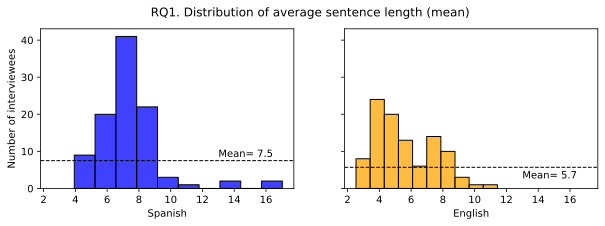

In [5]:
# ---------------------------------------------------------------------------- #
#                        3) RQ1: Average sentence length                       #
# ---------------------------------------------------------------------------- #

# ------------ a) Calculate the number of sentences for each child ----------- #
spa_sample_df["sentence_count"] = spa_sample_df.text.apply(lambda x: q1_stentence_length(x)[0])
eng_sample_df["sentence_count"] = eng_sample_df.text.apply(lambda x: q1_stentence_length(x)[0])

# ---------- b) Calculate the average sentence length for each child --------- #
spa_sample_df["sentence_length_mean"] = spa_sample_df.text.apply(lambda x: q1_stentence_length(x)[1])
eng_sample_df["sentence_length_mean"] = eng_sample_df.text.apply(lambda x: q1_stentence_length(x)[1])

# ------ c) Plot the distribution of average sentence length by language ----- #
plot_length_distribution, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3), sharex=True, sharey=True)
plot_length_distribution.subplots_adjust(top=0.85)
plot_length_distribution.suptitle("RQ1. Distribution of average sentence length (mean)", fontsize=12, x=0.5, y=0.95)

sns.histplot(ax=axes[0], data=spa_sample_df, x="sentence_length_mean", bins=10, color="blue")
sns.histplot(ax=axes[1], data=eng_sample_df, x="sentence_length_mean", bins=10, color="orange")

# ---------------------------------------------------------------------------- #
#                               Plot modification                              #
# ---------------------------------------------------------------------------- #

# Modify the plot - Change the xy labels
axes[0].set_xlabel("Spanish"); axes[1].set_xlabel("English")
axes[0].set_ylabel("Number of interviewees")

# Modify the plot - Add the line of Mean
mean_spa = round(spa_sample_df.sentence_length_mean.mean(), 1)
mean_eng = round(eng_sample_df.sentence_length_mean.mean(), 1)

axes[0].axhline(y = mean_spa, color="black", linestyle="--", linewidth=1)
axes[1].axhline(y = mean_eng, color="black", linestyle="--", linewidth=1)

axes[0].annotate(text = f"Mean= {mean_spa}", xy=(13, mean_spa+1))
axes[1].annotate(text = f"Mean= {mean_eng}", xy=(13, mean_eng-3))

d) Conduct T-test for the differences between the two languages

In [6]:
# ------------------- d) Conduct T-test for the differences ------------------ #
length_ttest = stats.ttest_ind(
    spa_sample_df["sentence_length_mean"],
    eng_sample_df["sentence_length_mean"], 
)

print("=====")
print("TABLE 3: Average sentence length by language")
print("=====")

Tab3 = pd.DataFrame({
    "Language": ["Spanish", "English"],
    "Sample size": [100, 100],
    "Mean": [mean_spa, mean_eng],
    "Std": [
        round(spa_sample_df.sentence_length_mean.std(), 1), 
        round(eng_sample_df.sentence_length_mean.std(), 1)]
})

Tab3["Mean (± Std)"] = Tab3['Mean'].astype(str) +" (± " + Tab3['Std'].astype(str) + ")"
Tab3["T statistic"] = round(length_ttest.statistic, 1)
Tab3["P value"] = round(length_ttest.pvalue, 1)

Tab3.at[1, "T statistic"] = "N/A" 
Tab3.at[1, "P value"] = "N/A"

Tab3 = Tab3[["Language", "Sample size", "Mean (± Std)", "T statistic", "P value"]]
Tab3

=====
TABLE 3: Average sentence length by language
=====


,Language,Sample size,Mean (± Std),T statistic,P value
0,Spanish,100,7.5 (± 2.1),6.3,0.0
1,English,100,5.7 (± 1.9),N/A,N/A


## 4) RQ2: Most frequently used part of speech

a) Load the language model from Spacy

b) Clean the paragraphs 

c) Match the word tokens with POS and count the corresponding occurences

d) Transform the obtained occurences into readable dataframe and calculate the % 

e) Plot the distribution for the occurences by languages

In [7]:
# ---------------------------------------------------------------------------- #
#                  4) RQ2: Most frequently used part of speech                 #
# ---------------------------------------------------------------------------- #

# ------------------- a) Load the language model from Spacy ------------------ #
spa_model = spacy.load('es_dep_news_trf')
eng_model = spacy.load('en_core_web_trf')

# -------------------------- b) Clean the sentences -------------------------- #
spa_clean = q2_sentence_cleaning(df_dample = spa_sample_df, spa_or_eng_model = spa_model)
eng_clean = q2_sentence_cleaning(df_dample = eng_sample_df, spa_or_eng_model = eng_model)

# --------------------- c) Match the word tokens with POS -------------------- #
# ------------------- d) Count the corresponding occurences ------------------ #
spa_POS = q2_part_of_speech(cleaned_sentences_list = spa_clean, spa_or_eng_model = spa_model)
eng_POS = q2_part_of_speech(cleaned_sentences_list = eng_clean, spa_or_eng_model = eng_model)

spa_pos_match, spa_pos_count = spa_POS[0], spa_POS[1]
eng_pos_match, eng_pos_count = eng_POS[0], eng_POS[1]

Preview: cleaned sentences
['niño durmió perro', 'niño vio rana', 'niño puso ropa', 'perro llamaron rana']
Preview: cleaned sentences
['boy got present', 'pets', 'wanted open present', 'brand new book loved book']


/Users/noel/anaconda3/lib/python3.10/site-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [8]:
# --------- f) Transform into readable dataframe and calculate the % --------- #
def q2_transform_and_calculate (data_to_trans, language):
    language_col = f"POS_{language}"
    df_transformed = pd.DataFrame(list(data_to_trans.items())).rename(columns={0:language_col, 1:"Count"})
    df_transformed = df_transformed.sort_values(by = "Count", ascending=False).reset_index(drop = True)
    df_transformed["Count%"] = round(df_transformed["Count"] / df_transformed["Count"].sum() * 100, 2)
    df_transformed["pos_count_order"] = list(df_transformed.index + 1)
    df_transformed["language"] = language

    spacy_pos_dict = {
    "ADJ": "Adjective", "ADP": "Adposition", "ADV": "Adverb", "AUX": "Auxiliary", 
    "CONJ": "Conjunction", "CCONJ": "Coordinating conjunction",
    "DET": "Determiner",  "INTJ": "Interjection", 
    "NOUN": "Noun", "NUM": "Numeral", 
    "PART": "Particle", "PRON": "Pronoun", "PROPN": "Proper noun", 
    "PUNCT": "Punctuation", "SCONJ": "Subordinating conjunction", "SYM": "Symbol",
    "VERB": "Verb", "X": "Other","SPACE": "Space"}

    df_transformed_full = df_transformed.copy().rename(columns={language_col: "POS_full_form"})
    df_transformed_full = df_transformed_full.replace({"POS_full_form": spacy_pos_dict})

    df_output = pd.concat([df_transformed, df_transformed_full["POS_full_form"]], axis=1)
    df_output = df_output.head(5)

    return df_output

print("=====")
print("TABLE 4a: Distribution of part of speech (top 5 occurences) - Spanish")
print("=====")

TAB4a = q2_transform_and_calculate(spa_pos_count, "spa")
display(TAB4a)

print("=====")
print("TABLE 4b: Distribution of part of speech (top 5 occurences) - English")
print("=====")

TAB4b = q2_transform_and_calculate(eng_pos_count, "eng")
display(TAB4b)

=====
TABLE 4a: Distribution of part of speech (top 5 occurences) - Spanish
=====


,POS_spa,Count,Count%,pos_count_order,language,POS_full_form
0,NOUN,5071,47.12,1,spa,Noun
1,VERB,3655,33.96,2,spa,Verb
2,PROPN,1081,10.04,3,spa,Proper noun
3,ADJ,506,4.70,4,spa,Adjective
4,ADV,260,2.42,5,spa,Adverb


=====
TABLE 4b: Distribution of part of speech (top 5 occurences) - English
=====


,POS_eng,Count,Count%,pos_count_order,language,POS_full_form
0,NOUN,5259,43.96,1,eng,Noun
1,VERB,3236,27.05,2,eng,Verb
2,ADJ,1297,10.84,3,eng,Adjective
3,PROPN,1220,10.20,4,eng,Proper noun
4,INTJ,368,3.08,5,eng,Interjection


In [9]:
# ---------------------- g) Some examples for reporting ---------------------- #

# Spanish
for i in TAB4a['POS_spa']:
    print(i, ":")
    print(spa_pos_match[i])

print("\n--------------------------------------------------------------------\n")

# English
for i in TAB4b['POS_eng']:
    print(i, ":")
    print(eng_pos_match[i])

NOUN :
[niño, perrito, rana, niño, perro, niño, rana, niño, ropa, perro, rana, perro, niño, abejitas, niño, rana, niño, árbol, abejas, perro, niño, rana, niño, perro, agua, rana, hijitos, niño, rana, niño, rana, perro, noche, ropa, niño, perro, frasco, vidrio, ventana, frasco, perro, abejas, niño, búho, perro, niño, perro, em, perro, agua, shis, niño, ranas, ranas, rana, niñito, perrito, rana, noche, niño, perro, rana, rana, perro, cabeza, cosa, rana, perro, cosa, perro, cosa, perro, perro, niño, hueco, árbol, niño, árbol, niño, niño, roca, rana, cabeza, agua, niño, palo, familia, rana, rana, casa, niño, botella, niño, perro, niño, niño, niño, partes, perro, niño, bravo, perro, niño, hueco, perro, niño, tierra, cosa, agua, agua, ruido, perro, perro, rana, perro, niño, rana, perro, par, botas, perro, niño, rana, niño, perro, abejas, perro, perro, abejas, niño, ratón, perro, matas, niño, árbol, niño, lechuza, tumba, abejas, perro, niño, sapo, niño, n, perro, hueco, niño, n, hueco, niño, 

(Text(0.5, 0, ''), Text(0, 0.5, 'English (%)'))

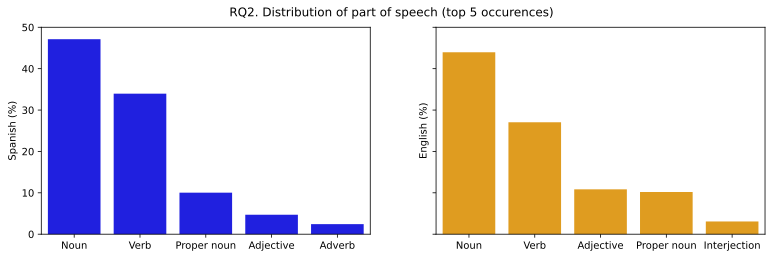

In [10]:
# --------- h) Plot the distribution for the occurences by languages --------- #
plot_pos_distribution, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 4), sharey=True)
plot_pos_distribution.subplots_adjust(top=0.83)
plot_pos_distribution.suptitle("RQ2. Distribution of part of speech (top 5 occurences)", fontsize=12, x=0.5, y=0.9)

sns.barplot(ax=axes[0], data=TAB4a, x="POS_full_form", y="Count%", color='blue')
sns.barplot(ax=axes[1], data=TAB4b, x="POS_full_form", y="Count%", color='orange')

# Modify the plot - Change the xy labels
axes[0].set(ylim=(0,50))
axes[0].set_xlabel(""), axes[0].set_ylabel("Spanish (%)")
axes[1].set_xlabel(""), axes[1].set_ylabel("English (%)")